In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

%matplotlib inline

In [9]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)

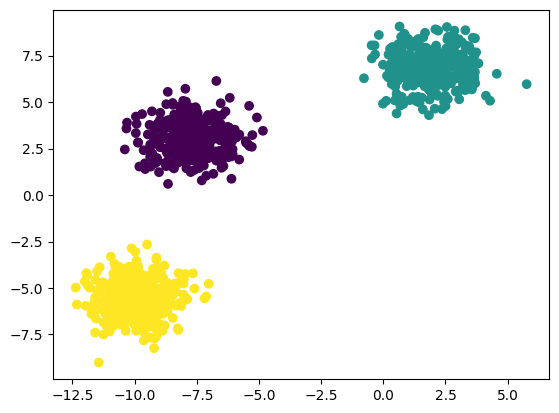

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)

In [11]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=11)

In [13]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [15]:
from sklearn.cluster import KMeans

In [16]:
#Elbow method to select the K value
wcss = []

for k in range(1,20):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[1400.0000000000005,
 494.79248636836286,
 48.86482505850003,
 43.06850672112045,
 37.873221118962384,
 37.59802058698522,
 27.84802111273089,
 26.805195277493475,
 23.120729467742024,
 19.552943280037194,
 18.20621557238421,
 17.42754064140238,
 15.757045333057413,
 15.43143736482845,
 14.09406200362764,
 13.555205779312702,
 13.175916097396275,
 11.45631831860205,
 10.847755266897813]

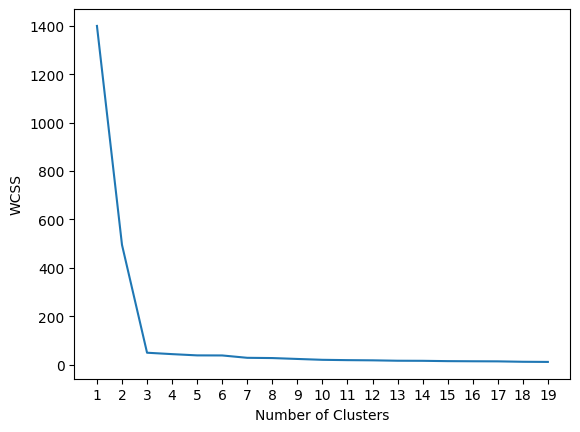

In [18]:
##plot elbow curve
plt.plot(range(1,20),wcss)
plt.xticks(range(1,20))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:
model = KMeans(n_clusters=3, init="k-means++")
model.fit_predict(X_train)

array([0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2,
       0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2,
       0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1,
       0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 1,
       1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1,
       2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1,
       2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1,
       0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0,
       1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1,
       2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1,

In [20]:
y_pred = model.predict(X_test)

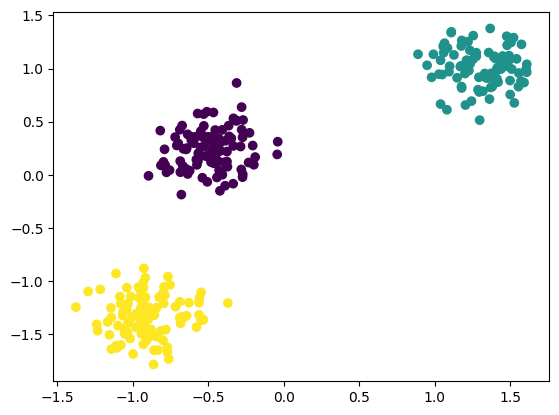

In [22]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

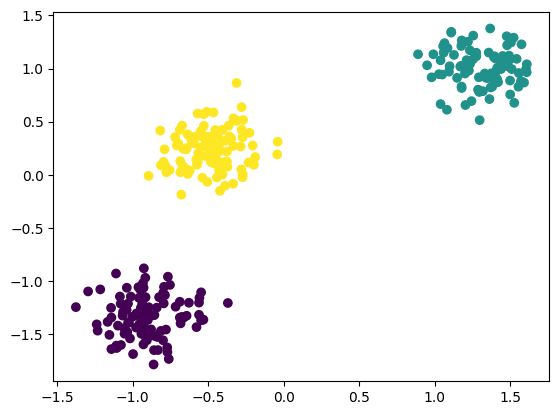

In [23]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [24]:
##Validating the K value

##kneeLocator

##Silhoutee Scoring

In [25]:
from kneed import KneeLocator
kl=KneeLocator(range(1,20),wcss,curve="convex", direction="decreasing")

In [26]:
kl.elbow

np.int64(3)

In [27]:
from sklearn.metrics import silhouette_score
silhouette_coef = []

for k in range(2,20):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coef.append(score)

In [28]:
silhouette_coef

[np.float64(0.6830390756154021),
 np.float64(0.8105198993146431),
 np.float64(0.6471765460603536),
 np.float64(0.46660262359524673),
 np.float64(0.3256877207547875),
 np.float64(0.33190717811073367),
 np.float64(0.3455339166729095),
 np.float64(0.3522058589696282),
 np.float64(0.3358782703107628),
 np.float64(0.34335540377639834),
 np.float64(0.3300610655156741),
 np.float64(0.3395390379572481),
 np.float64(0.3261548551127269),
 np.float64(0.3170367455932643),
 np.float64(0.3384026901411918),
 np.float64(0.3376778515648003),
 np.float64(0.3214633928950409),
 np.float64(0.3313675962513252)]

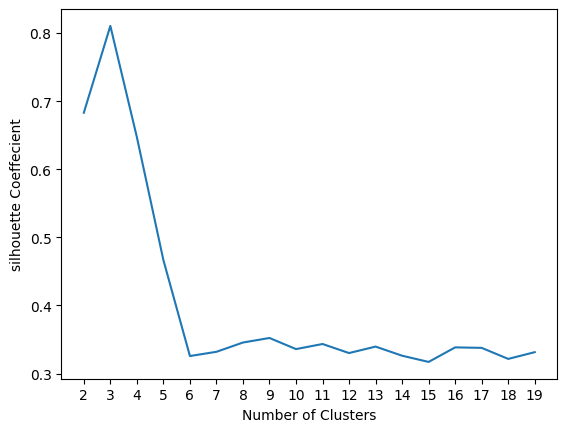

In [29]:
plt.plot(range(2,20),silhouette_coef)
plt.xticks(range(2,20))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette Coeffecient")
plt.show()